In [1]:
%pip install beautifulsoup4
%pip install textblob

     ---------------------------------------- 0.0/143.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/143.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/143.0 kB ? eta -:--:--
     ------- ----------------------------- 30.7/143.0 kB 217.9 kB/s eta 0:00:01
     ------------------ ------------------ 71.7/143.0 kB 357.2 kB/s eta 0:00:01
     ------------------------------------ 143.0/143.0 kB 653.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 217.9 kB/s eta 0:00:03
     -- ---------------------------------- 41.0/636.8 kB 245.8 kB/s eta 0:00:03
     ---- -------------------------------- 71.7/636.8 kB 393.8 kB/s eta 0:00:02
     -------- --------------------------- 143.4/636.8 kB 655.8 kB/s eta 0:00:01
     -

#### Reading Dataset

In [1]:
# disable warning
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [2]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [3]:
df['sentiment'].value_counts()

sentiment
Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: count, dtype: int64

In [4]:
import data_process.preprocessing as pr

In [7]:
df = pr._get_basic_features(df)

In [8]:
df.columns 

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

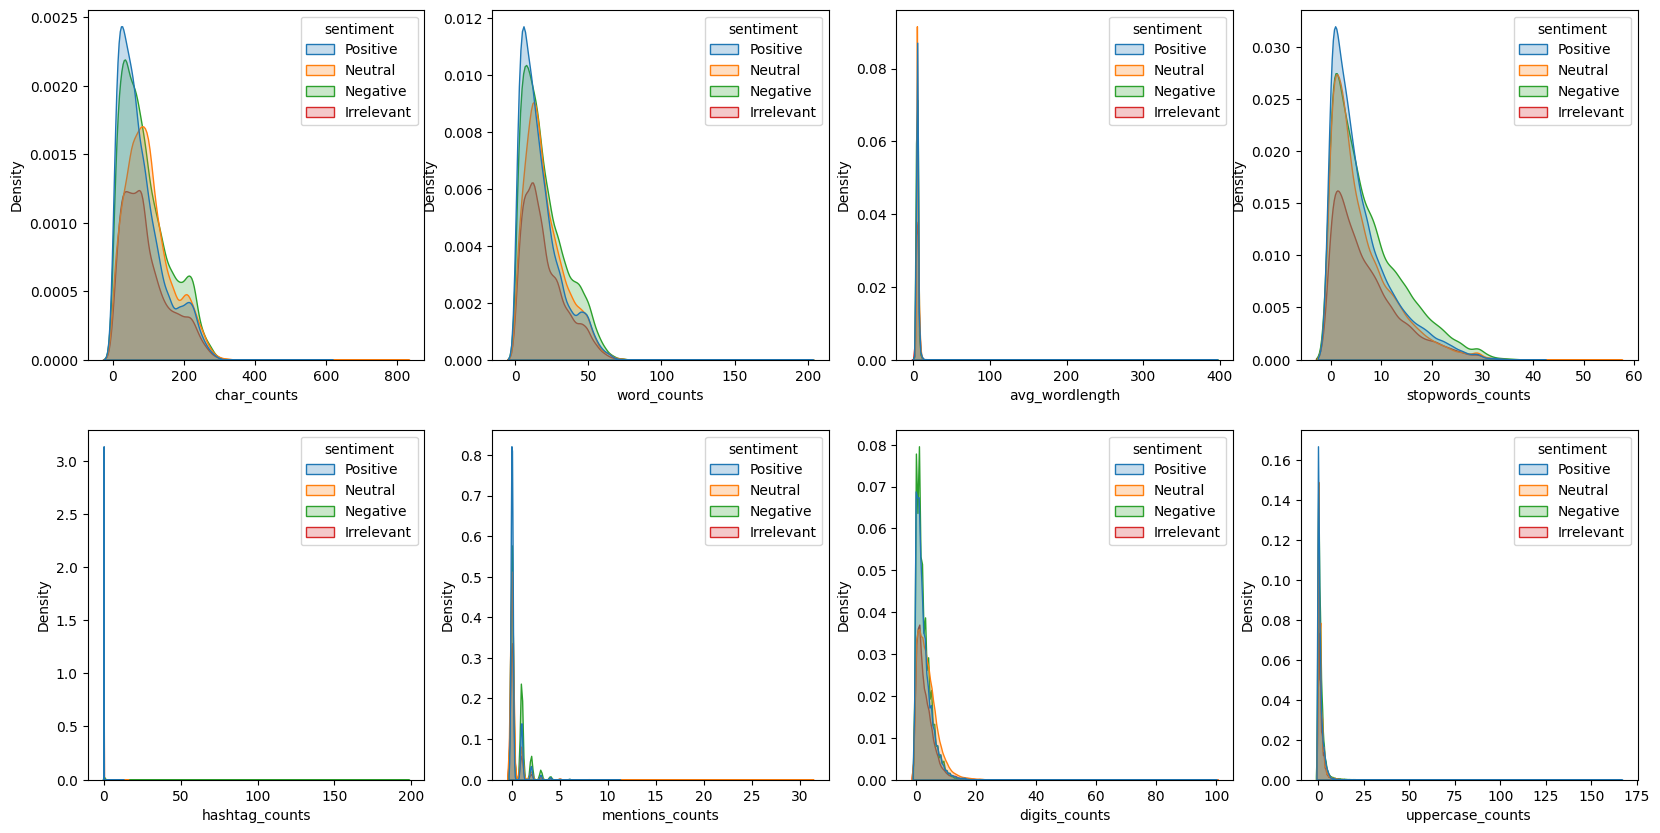

In [10]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

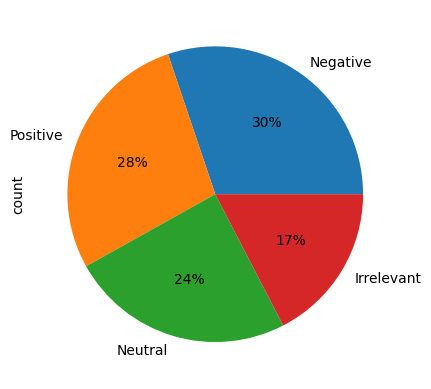

In [11]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [12]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

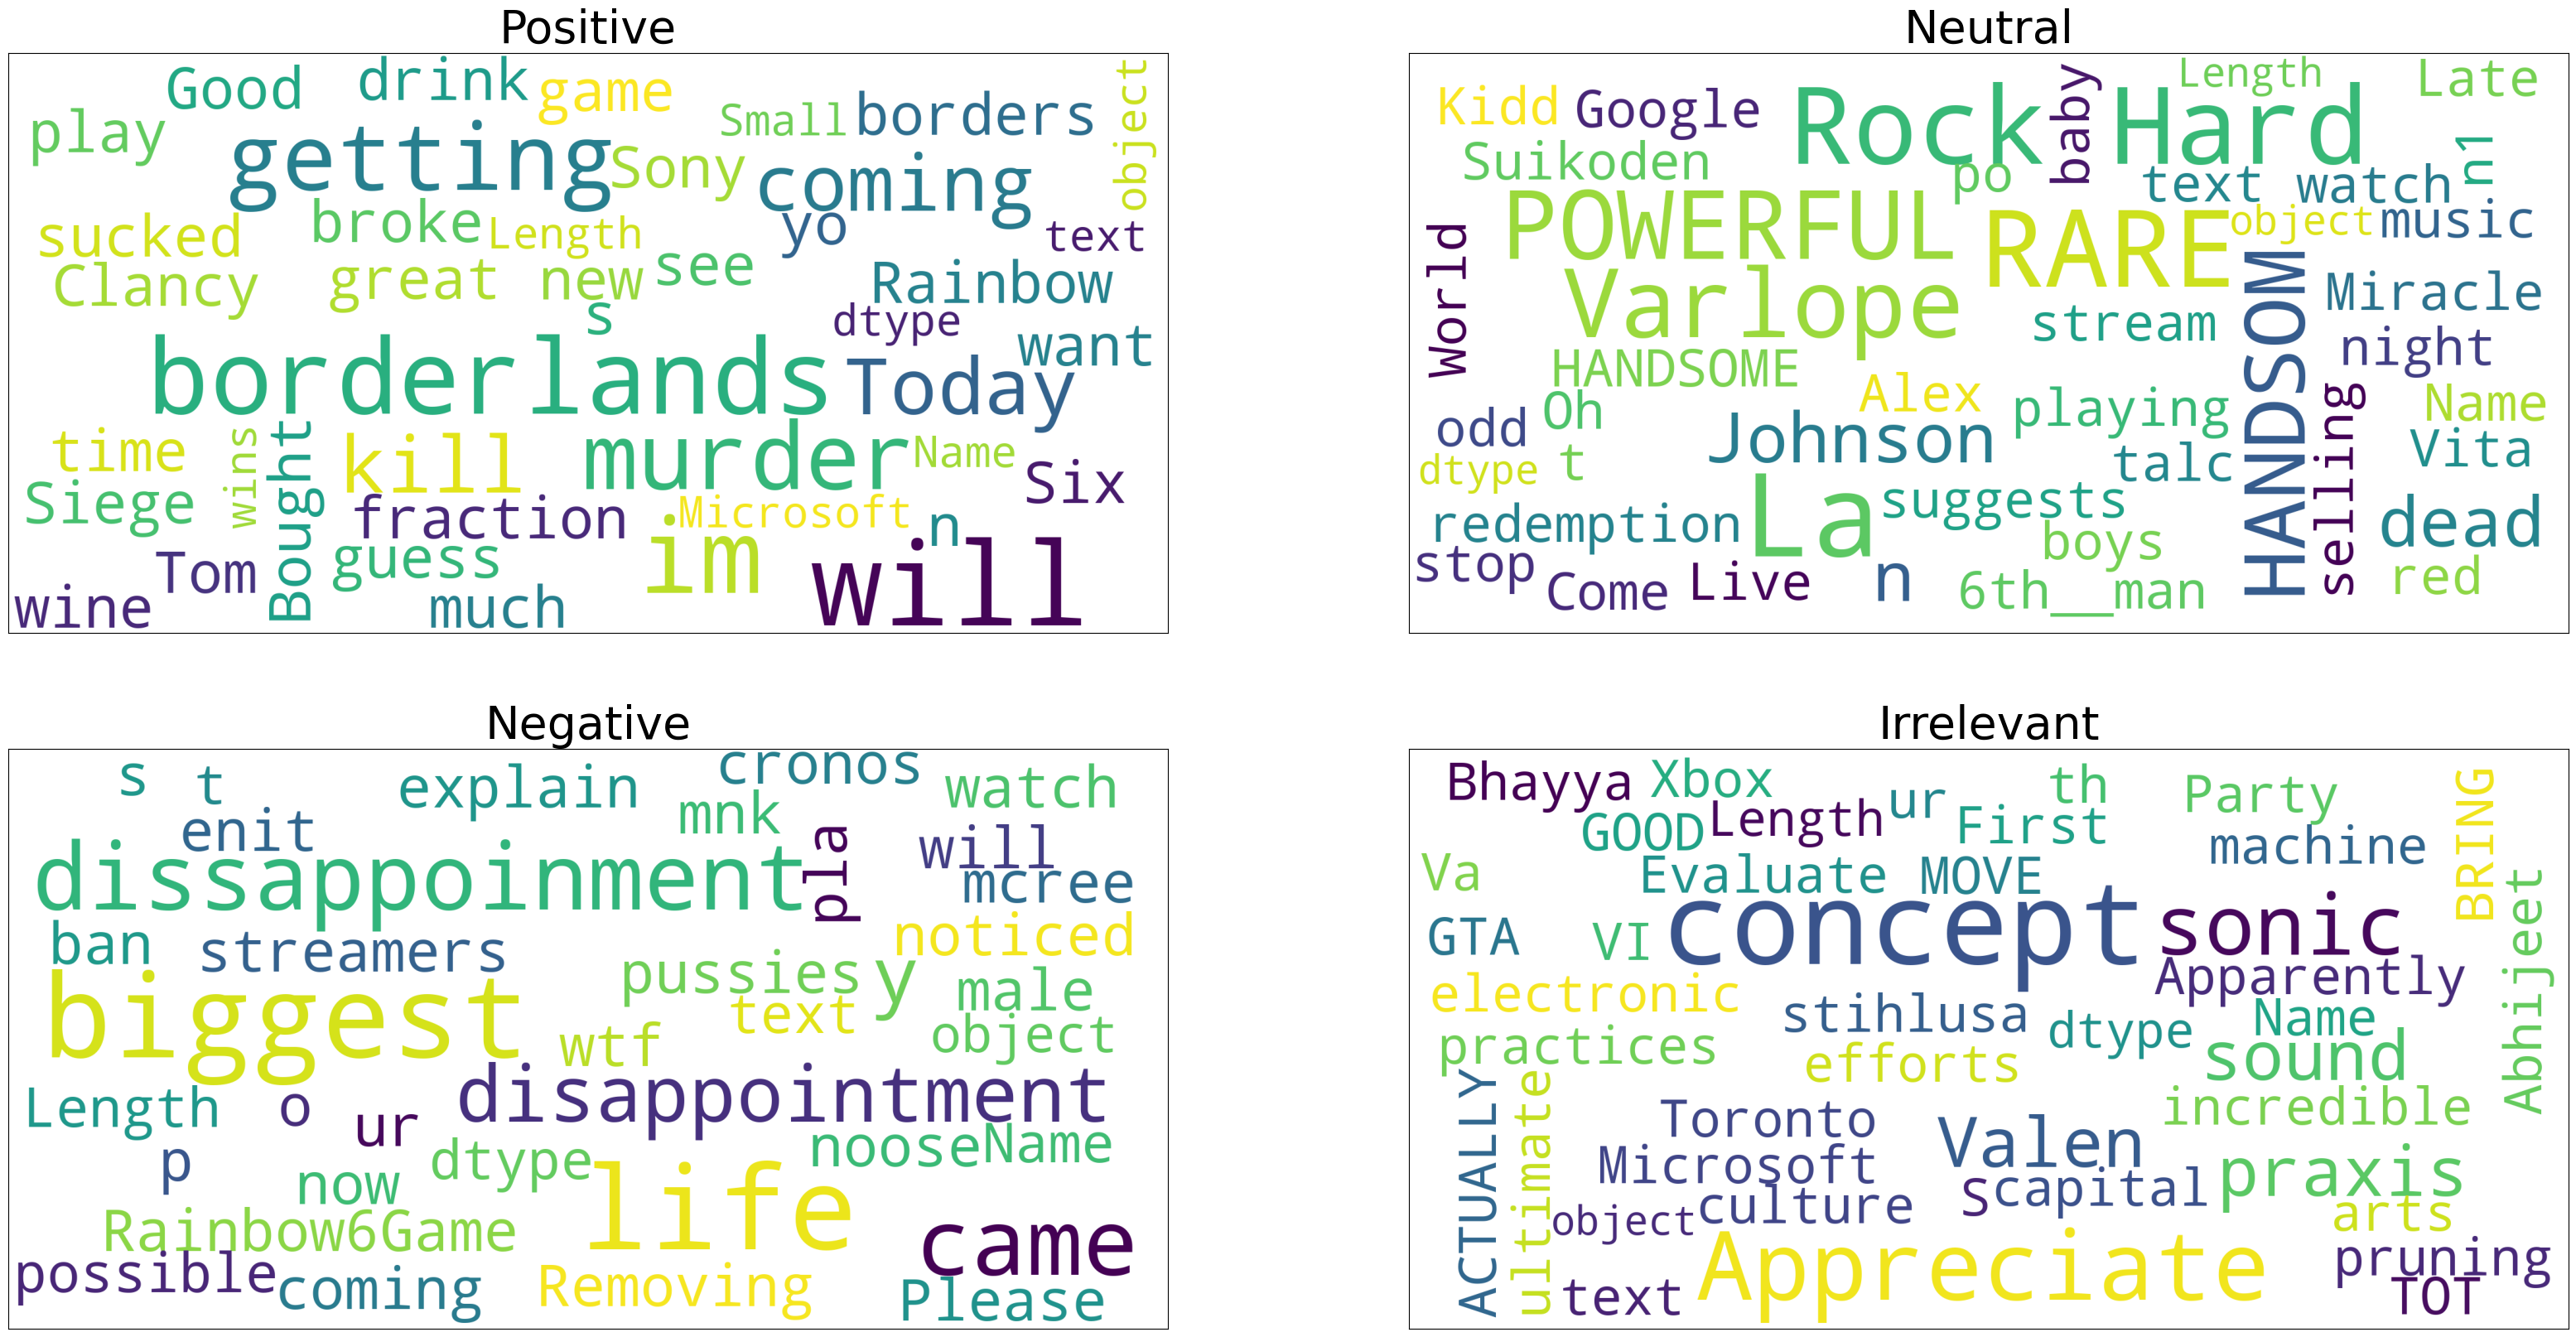

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

In [16]:
%pip install lxml


   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB 326.8 kB/s eta 0:00:12
   - -------------------------------------- 0.1/3.8 MB 853.3 kB/s eta 0:00:05
   --- ------------------------------------ 0.3/3.8 MB 1.6 MB/s eta 0:00:03
   ------ --------------------------------- 0.6/3.8 MB 2.5 MB/s eta 0:00:02
   --------- ------------------------------ 0.9/3.8 MB 3.3 MB/s eta 0:00:01
   ------------- -------------------------- 1.3/3.8 MB 4.0 MB/s eta 0:00:01
   ------------- -------------------------- 1.3/3.8 MB 4.0 MB/s eta 0:00:01
   -------------------- ------------------- 1.9/3.8 MB 4.4 MB/s eta 0:00:01
   ----------------------- ---------------- 2.2/3.8 MB 4.6 MB/s eta 0:00:01
   ---------------------------- ----------- 2.7/3.8 MB 5.1 MB/s eta 0:00:01
   --------------------------

In [19]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: pr._remove_urls(x))
df['text'] = df['text'].apply(lambda x: pr._remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: pr._remove_rt(x))

In [20]:
from bs4 import BeautifulSoup

df['text'] = df['text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


In [21]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,i am coming to the borders and i will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you all,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)


In [23]:
X_train.shape, X_test.shape

((59717,), (14930,))

In [25]:
%%time
# model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

# evaluation
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9054253181513731
CPU times: total: 31min 24s
Wall time: 7min 22s


In [27]:
# save model
import pickle

pickle.dump(clf, open('sentiment_analysis.pkl', 'wb'))

In [28]:
X_test.tolist()[:20]

['add 4 callofduty and in roguecompany now teams o and everyone plays under play _ pso2 or ghostrecon i am also one of the best grovers in paladinsgame and best junkrat or mccree in overwatchleague dont forget best vulcan in smitegame i play destinythegame and fortnitegame',
 'tmobile you guys kids are really very slow in tuba star city az makes people go to google verizon',
 'i will make google top ranking high quality seo backlinks fiverrcom share nwewvp',
 'i know a guy whos tablet crashes today after 10 years he tried to fix it without google videos and plugging the tv into a different outlet no luck',
 'eamaddennfl movement is incredible',
 'internship manager',
 'bgs not in first by hearthstonebattlegrounds gameforcejphearthstonee3',
 'almost 2 years after launch and 3 cancelled season later bfv still now have game same in mp even though its fully functional in ghost campaign touche beyond every wire putting one nail in the coffin at a time',
 'so wait horses arthura poo hahaha s